In [1]:
#import librariese

In [241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sb
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

In [3]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the data

In [5]:
crime=pd.read_csv(r"C:\Users\Mandar\Downloads\crime_data.csv")
crime


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime.shape

(50, 5)

In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
# Renaming the Unnamed: 0 Column into States
crime = crime.rename(columns={"Unnamed: 0":"States"})
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
# Convert non-numeric columns to appropriate data types
#crime['States'] = pd.to_numeric(crime['States'], errors='coerce')

In [11]:
# checking for missing values
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
#checking for duplicates values
crime[crime.duplicated()].shape

(0, 5)

In [13]:
crime[crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


In [14]:
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# there are no missing values

# Exploring data using Visualisation

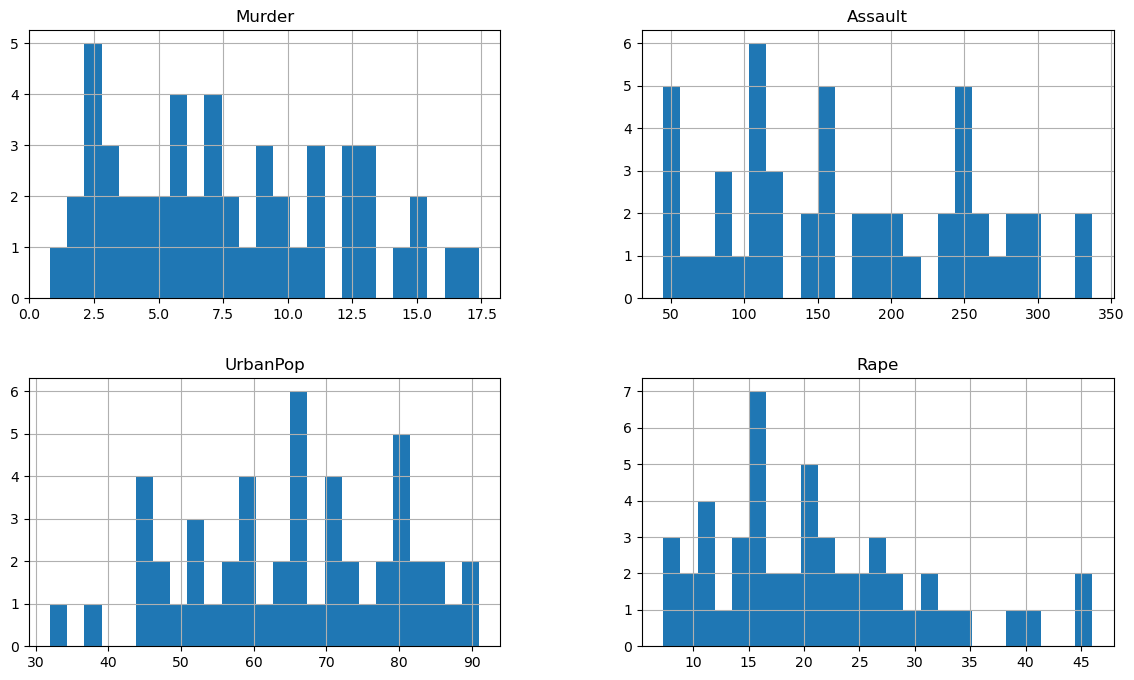

In [15]:
# HISTOGRAM 
crime.hist(figsize=(14,8),bins=25)
plt.show()


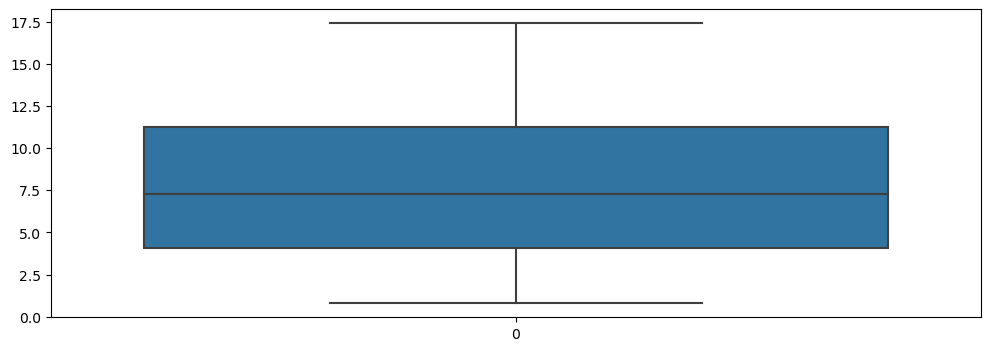

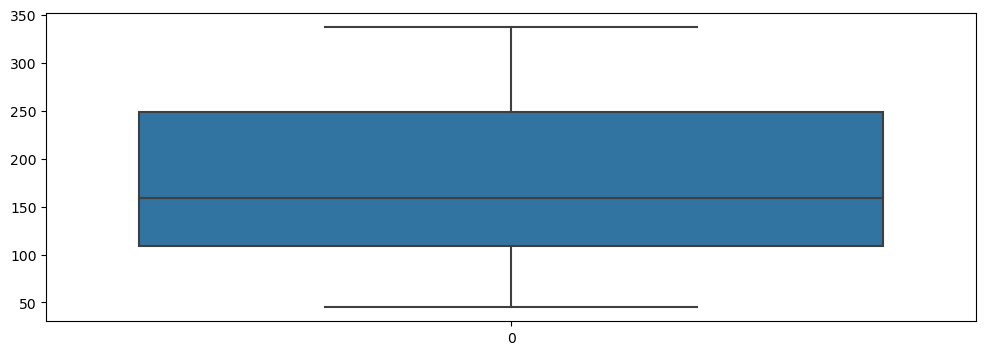

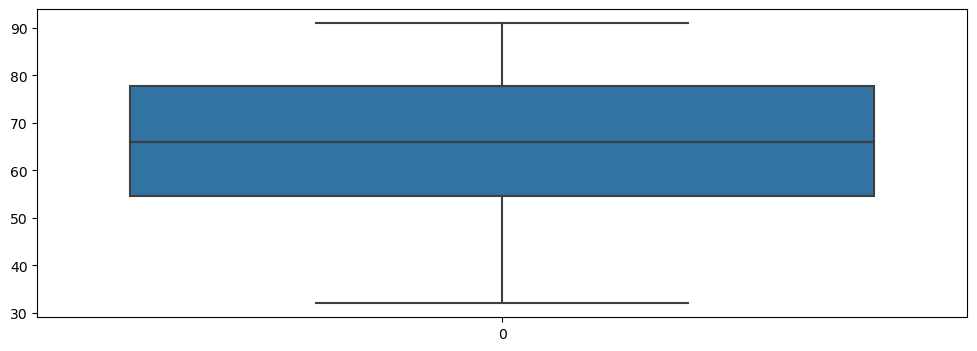

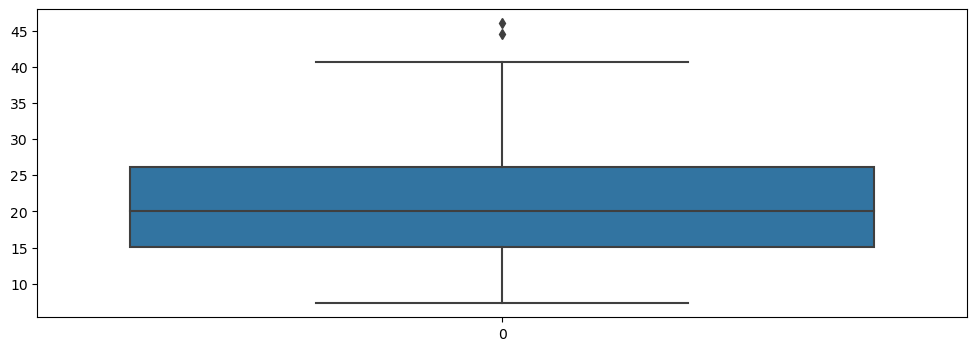

In [16]:
#Boxplot
for feature in crime.columns[1:]:
    plt.figure(figsize=(12,4))
    sb.boxplot(crime[feature])

Comparing features using Boxplots¶

<Axes: >

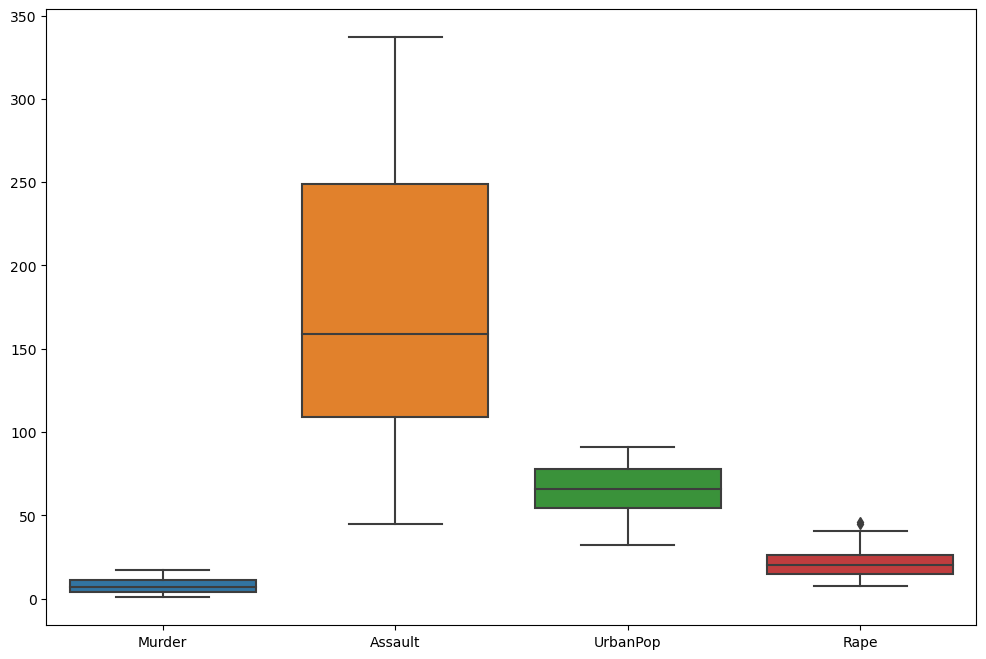

In [17]:
plt.figure(figsize=(12,8))
sb.boxplot(data=crime)




# We can clearly see that Assault crime rate is high, followed by rape and murder crime rate

Correlation and Heat map

In [26]:
# we have to select those data coloumns who have numeric values.
numeric_crime = crime.select_dtypes(include=[np.number])
numeric_crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [28]:
# Checking for Correlation between variables
numeric_crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


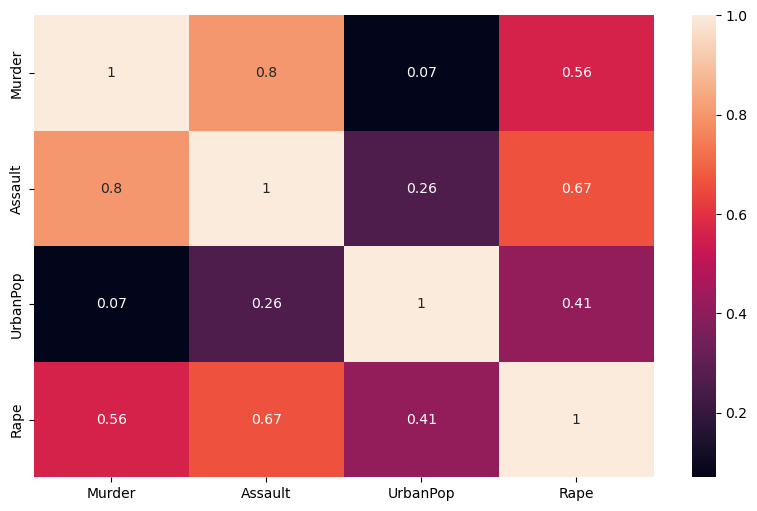

In [29]:
plt.figure(figsize=(10,6))
sb.heatmap(numeric_crime.corr(),annot=True)
plt.show()

Observation

We can see that 'Urban' population is not much influencing the Assault and murder rate. But it may be a reason for Rape rate.

But Murder rate and Rape rate are strongly correlated to Assault rate.

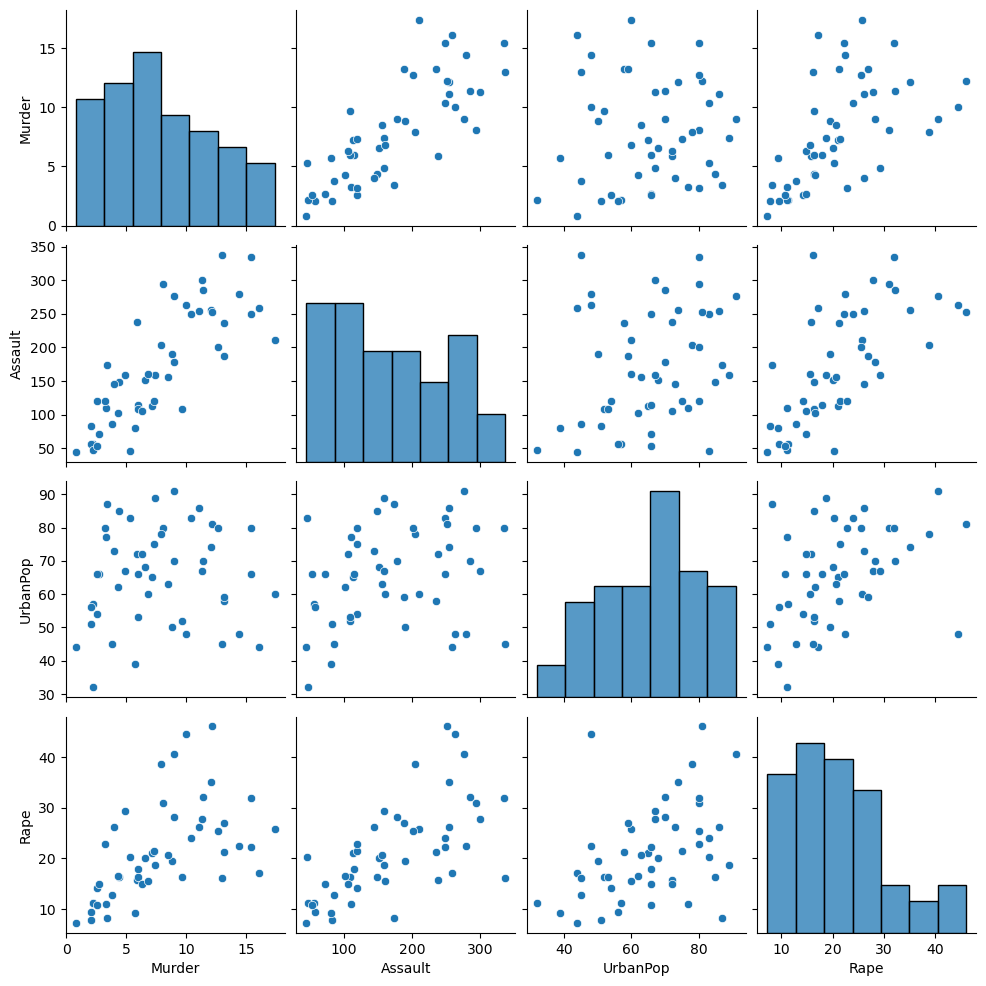

In [31]:
sb.pairplot(data=numeric_crime)

Visualizing features State wise

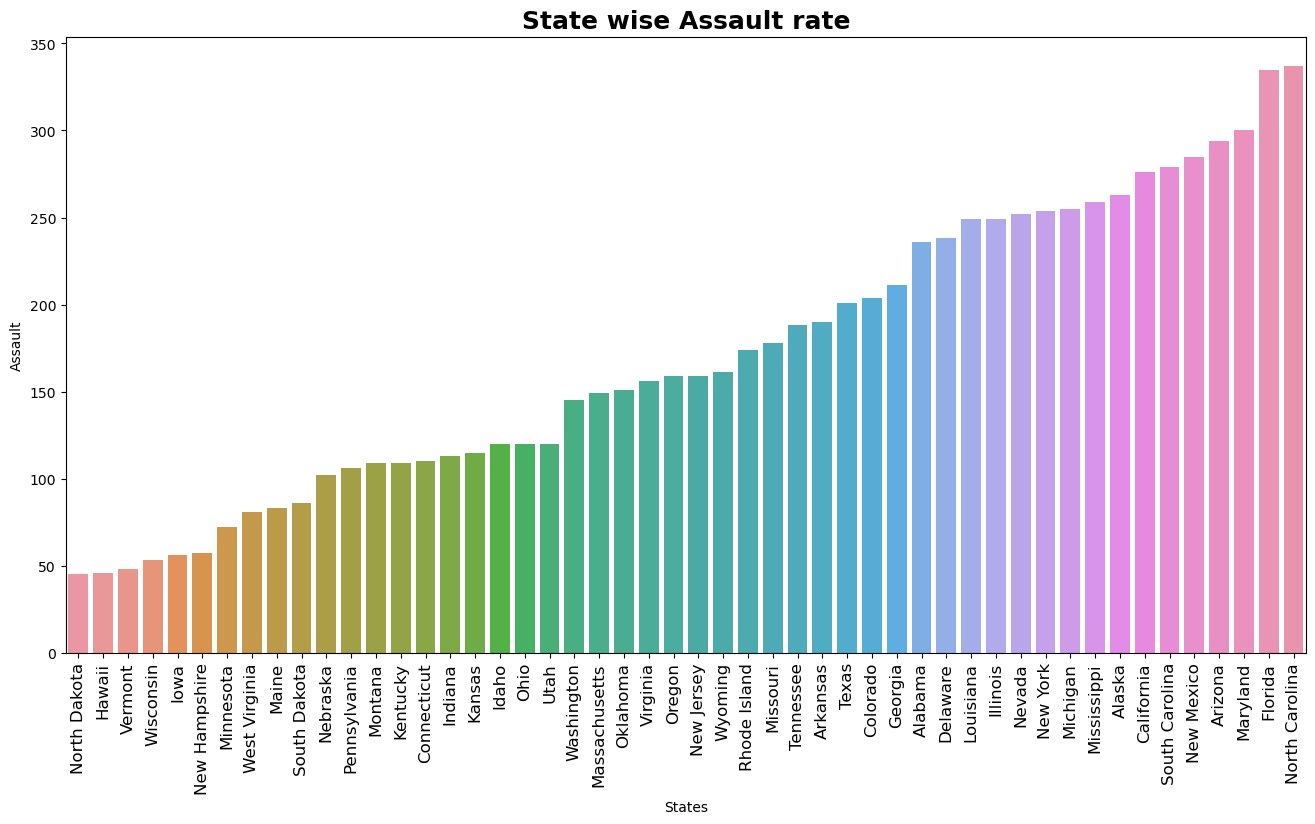

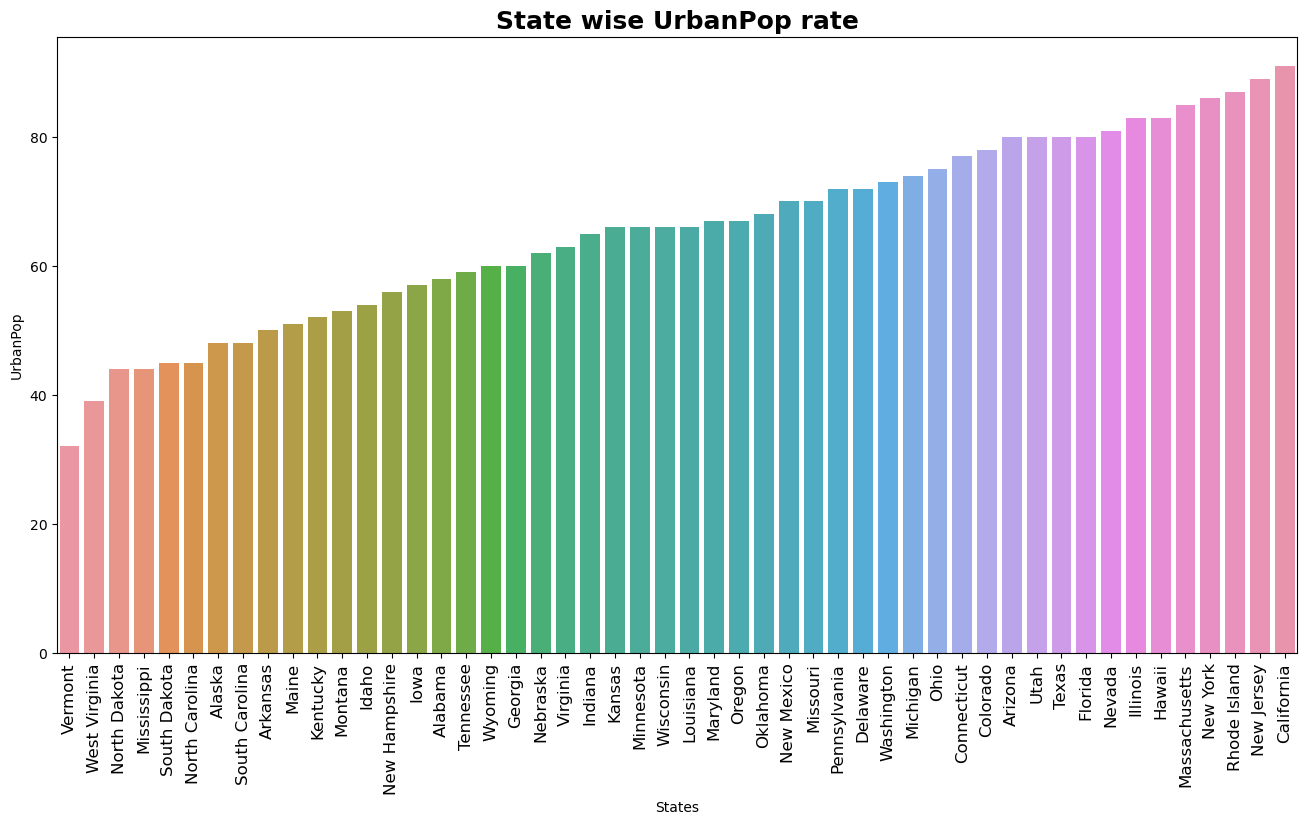

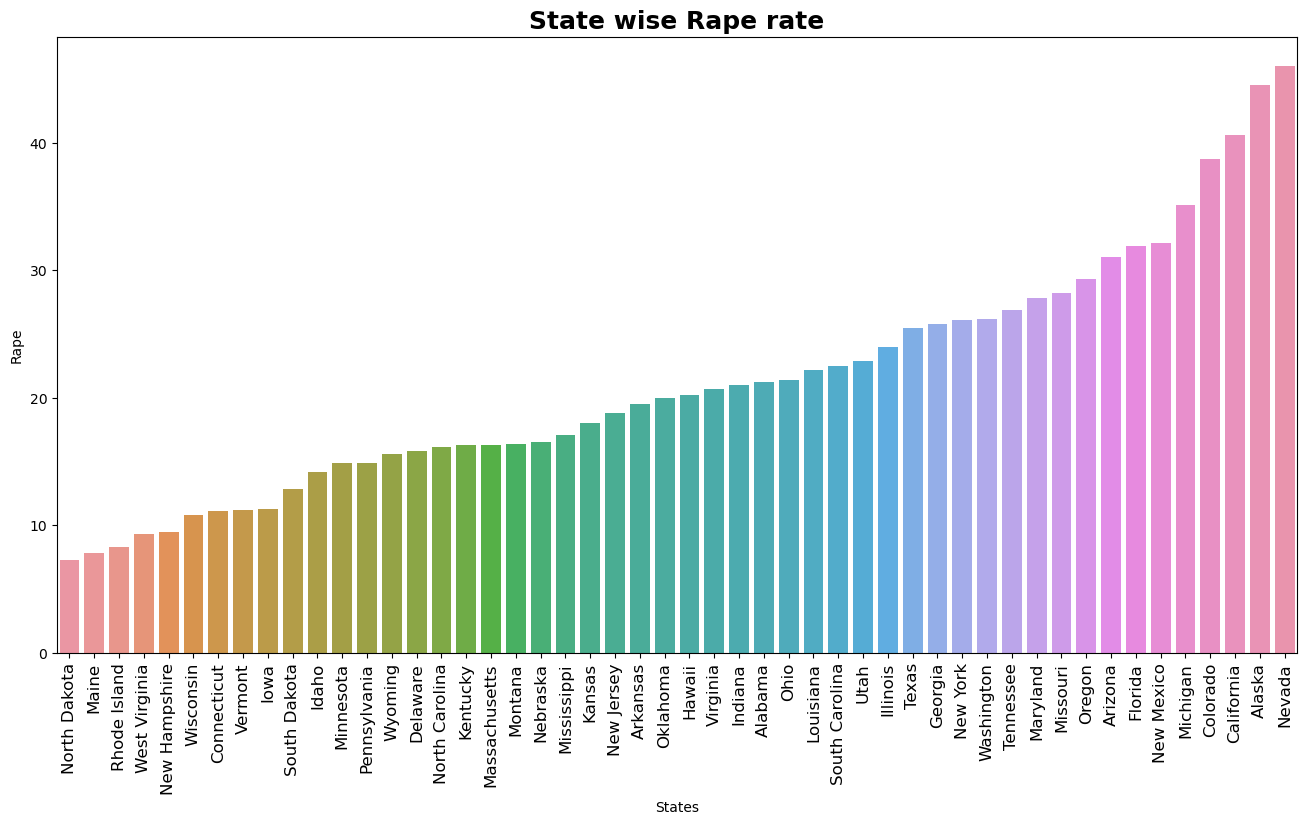

In [30]:
for i in numeric_crime.columns[1:]:
    plt.figure(figsize=(16,8))
    sb.barplot(x=crime["States"],y=i, data=crime, 
              order=crime.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("State wise "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

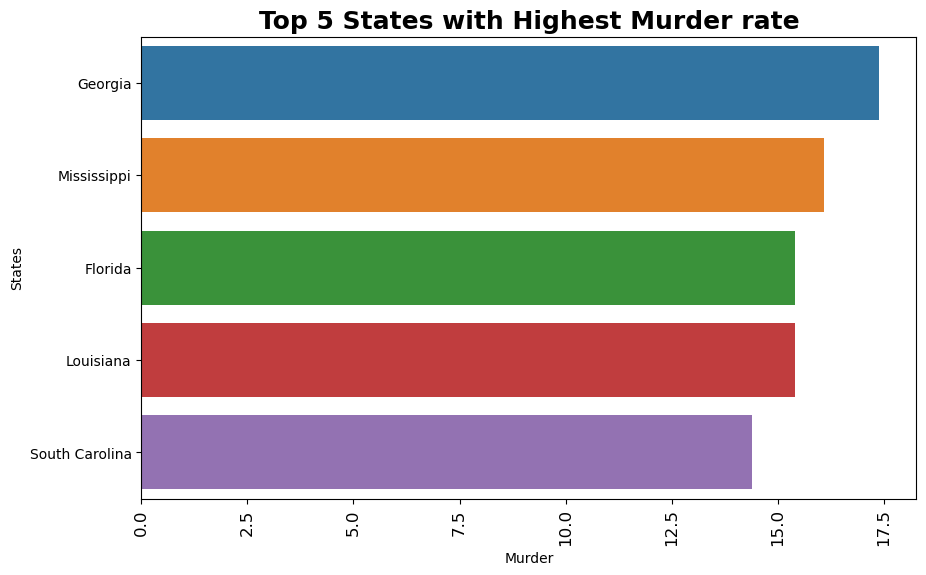

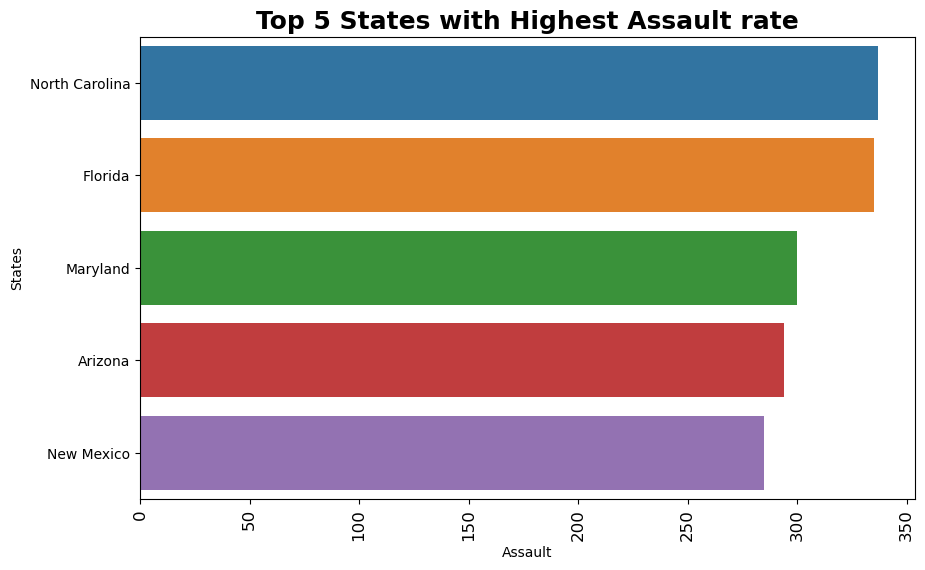

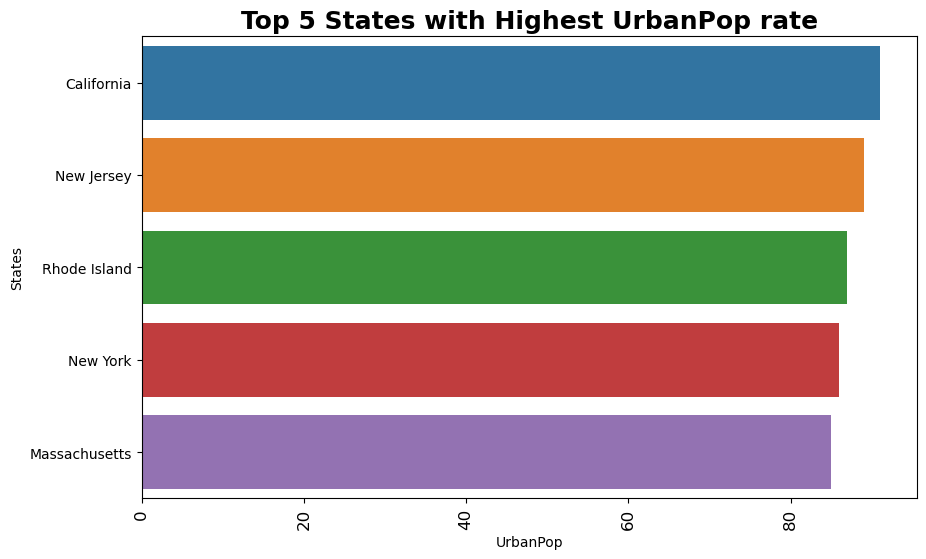

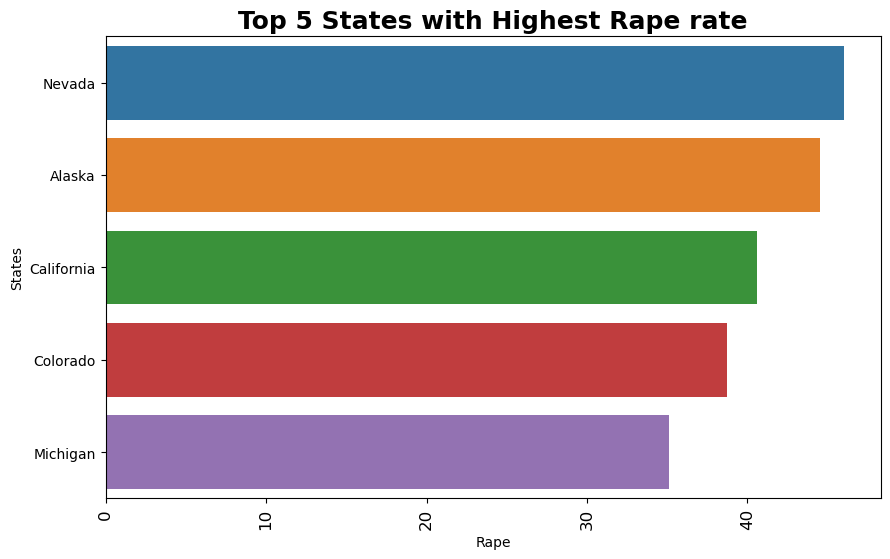

In [33]:
for i in crime.columns[1:]:
    plt.figure(figsize=(10,6))
    sb.barplot(x=i,y=crime["States"], data=crime, 
              order=crime.sort_values(i,ascending=False).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Highest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

# we clearly seen that

#In Florida, the Murder rate and Assault rate are high.

#In California, the Urban population is high due to which the Rape rate is also high.

#But in other countries, we don't see much resemblence.

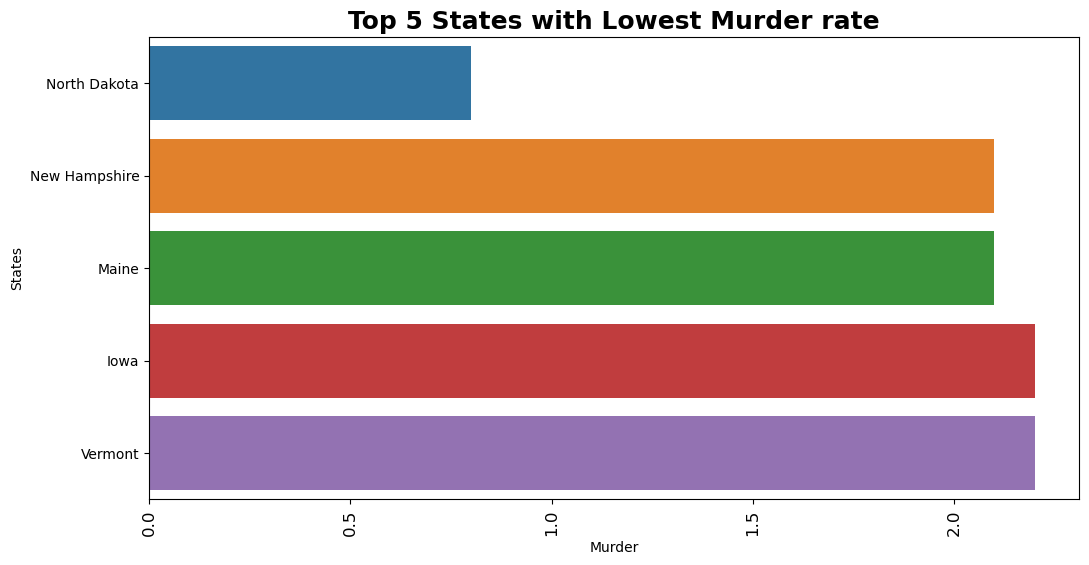

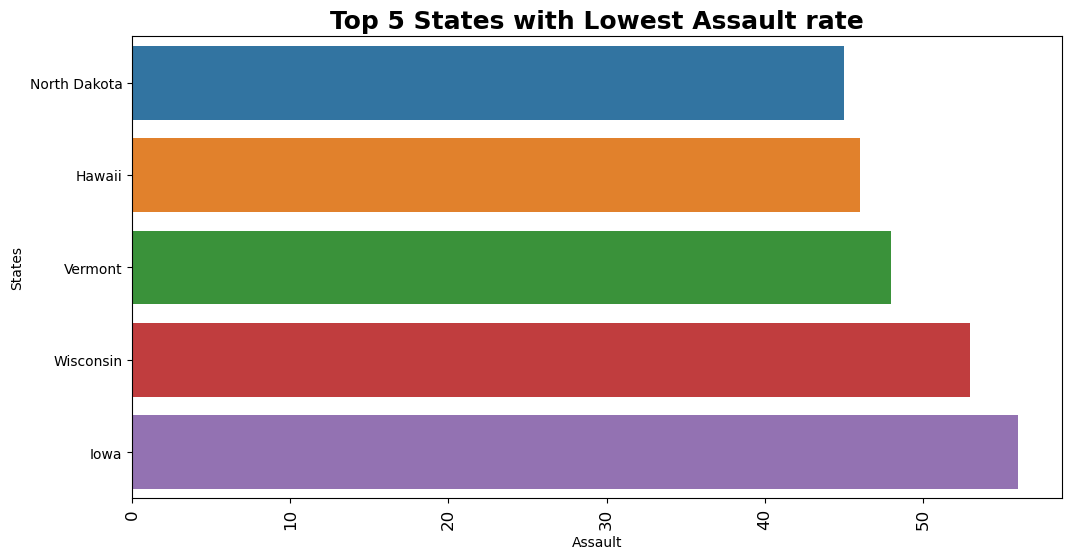

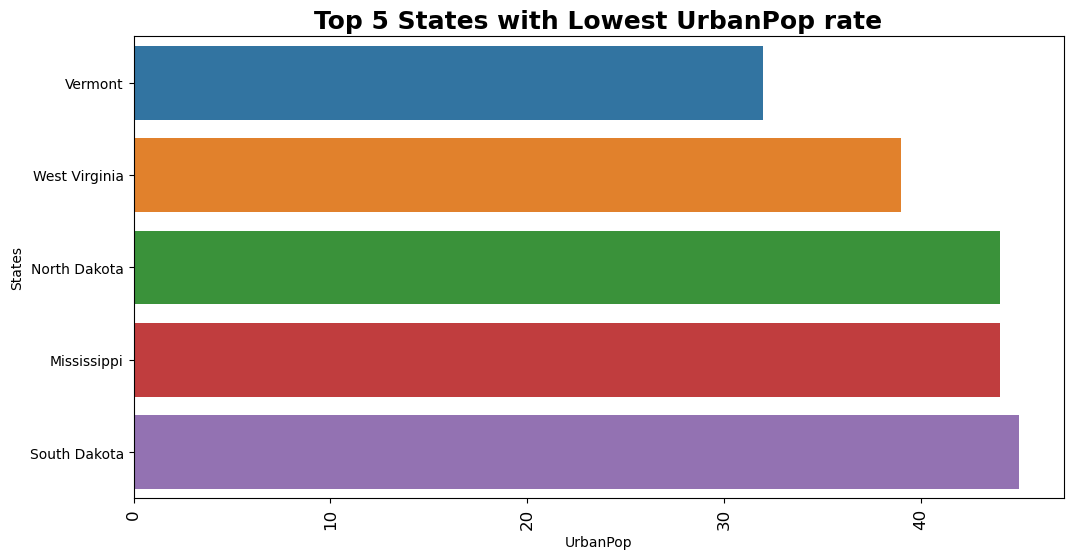

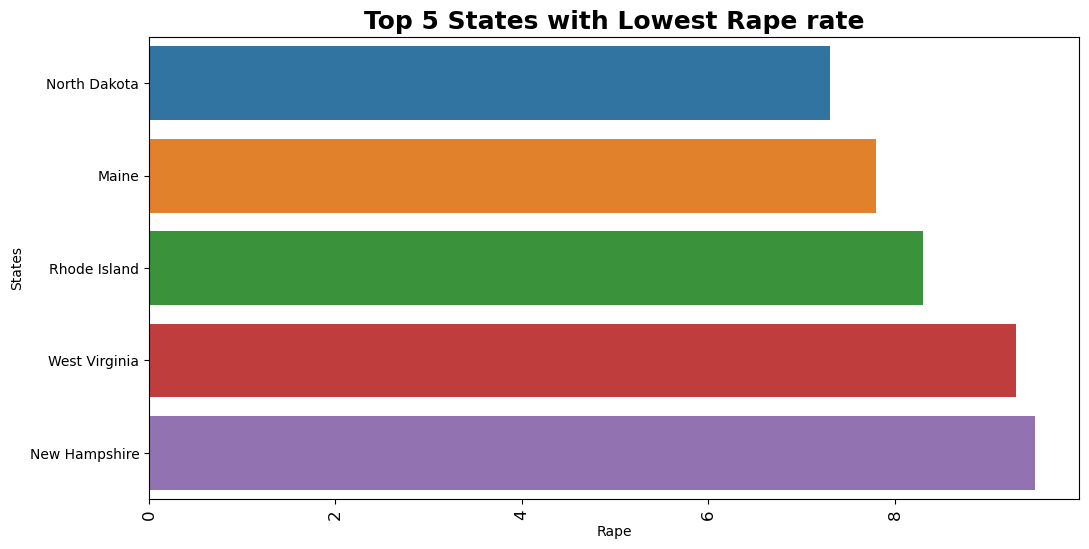

In [37]:
for i in crime.columns[1:]:
    plt.figure(figsize=(12,6))
    sb.barplot(x=i,y=crime["States"], data=crime, 
              order=crime.sort_values(i,ascending=True).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Lowest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

#We can clearly see that the North Dakota has the lowest crime rate and the urban population is also less.

Vermont with lowest urban population has the low murder rate and assault rate.

But in other countries, we don't see much resemblence.

In [39]:
#Standardising the data
crime_mdf = crime.drop(['States'],axis=1)
crime_mdf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [41]:
standard_scaler = StandardScaler()
crime_std = standard_scaler.fit_transform(crime_mdf)
crime_std.shape

(50, 4)

In [42]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [45]:
df_norm=norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [47]:
df_norm.shape

(50, 4)

 The normlizung and Standerdising give almost same result

Using Hierarchical Clustering model

Creating Avergae Linkage to determine number of cluster

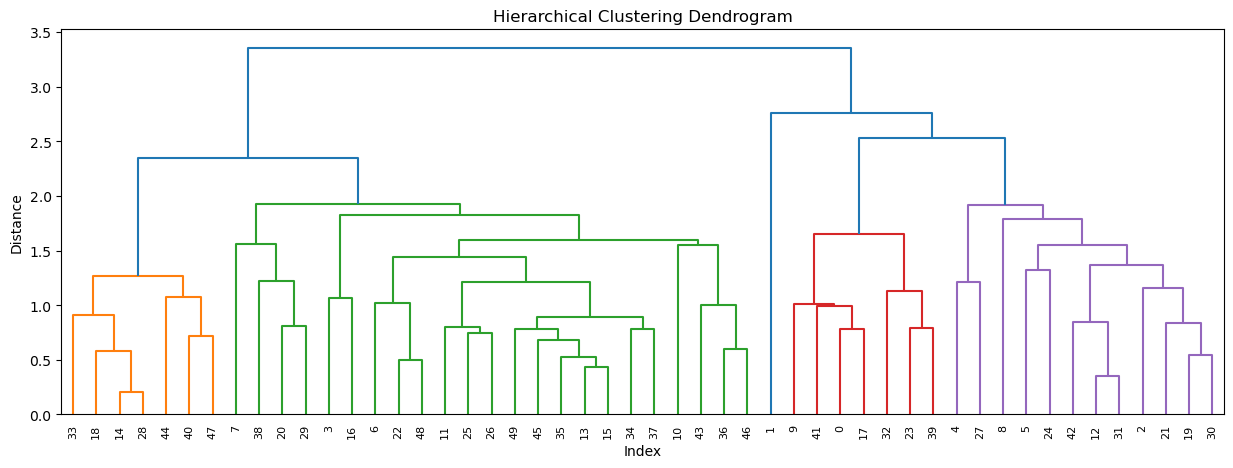

In [55]:
#dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average',metric="euclidean"))
z = linkage(crime_std, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

Here we can see that  there are 5 no of clusters are formed

# Buliding the Clustering model

Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [57]:
for nc in range(2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(crime_std)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr=silhouette_score(crime_std, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.34863679190476177
For n_clusters = 4 The average silhouette_score is : 0.3636819420151221
For n_clusters = 5 The average silhouette_score is : 0.3212682619092323


Model with 5 no. of clusters has the lowest accuracy. Hence build the model with 5 no. of clusters.¶

In [85]:
# create clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [86]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [87]:
crime['h_clusterid']=hc.labels_
crime.head()


,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


Analysing the results obtained from the model¶

In [88]:
crime.iloc[:,1:].groupby(crime.h_clusterid).mean() 

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,5.715000,132.300000,70.800000,18.100000,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.180000,78.700000,49.300000,11.630000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


We can see that 5 no. of clusters are formed.

In [90]:
h_cluster_0 = crime[(crime.h_clusterid==0)]
h_cluster_0   

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0
29,New Jersey,7.4,159,89,18.8,0


In [91]:
h_cluster_1 = crime[(crime.h_clusterid==1)]
h_cluster_1   

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [92]:
h_cluster_2 = crime[(crime.h_clusterid==2)]
h_cluster_2   

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [93]:
h_cluster_3 = crime[(crime.h_clusterid==3)]
h_cluster_3   

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [94]:
h_cluster_4 = crime[(crime.h_clusterid==4)]
h_cluster_4   

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
1,Alaska,10.0,263,48,44.5,4


Observation

We can observe that Cluster-5,clusterid-4 contains only one observation, that is of state 'Alaska'.

'Alaska' has low urban population rate, but it has high Rape rate when compared to state 'South Calorina' of Cluster-3 having same urban popualtion rate. 

That is the reason why it stood differently from all the clusters.

<Figure size 960x480 with 0 Axes>

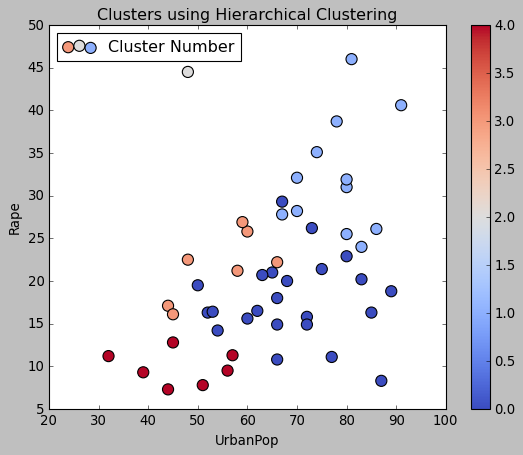

In [95]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

Observation

We can see the different clusters indicated in different colors.

As mentioned above the Cluster-5 observation is completely different with low Urban population rate and high Rape rate.

<Figure size 960x480 with 0 Axes>

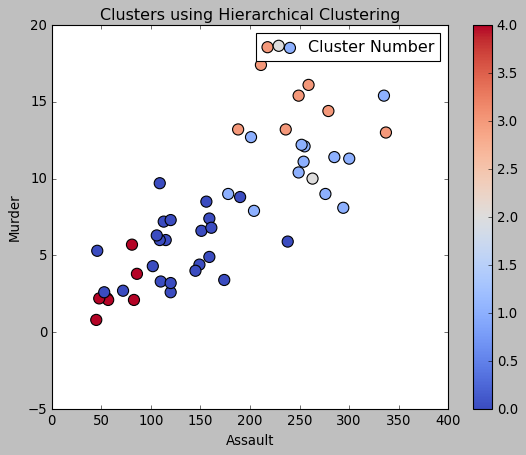

In [96]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering')
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

Evaluating accuracy of the model using Silhouette score

In [102]:
#Silhouette score ranges from -1 to 1.,'-1'indicates model is not good.'1',indicates model is best.)
#'0' indicates clusters are overlapping)
slht_scr_hc = silhouette_score(crime_std, cluster_labels)
slht_scr_hc

0.3212682619092323

The score is closer to '0',it means that model is not accurate at classifying the data,as clusters are overlapping,so we try other methods of clustering

# Kmeans

Determing no. of clusters using 'Elbow method'

In [188]:
crime_kmeans=pd.read_csv(r"C:\Users\Mandar\Downloads\crime_data.csv")
crime_kmeans.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [189]:
# Renaming the Unnamed: 0 Column into States
crime_kmeans = crime_kmeans.rename(columns={"Unnamed: 0":"States"})
crime_kmeans.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [199]:
#modifying the data
crime_kmeans_mdf = crime_kmeans.drop(['States'],axis=1)
crime_kmeans_mdf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [200]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [203]:
df_norm=norm_func(crime_kmeans_mdf.iloc[:,0:])
df_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [204]:
df_norm.shape

(50, 4)

In [205]:
standard_scaler = StandardScaler()
crime_kmeans_std = standard_scaler.fit_transform(crime_kmeans_mdf)
crime_kmeans_std.shape

(50, 4)

As we know from above obeservation standardisation& Normalization having almost same result we use satndardize data to perform kMeans clustering.

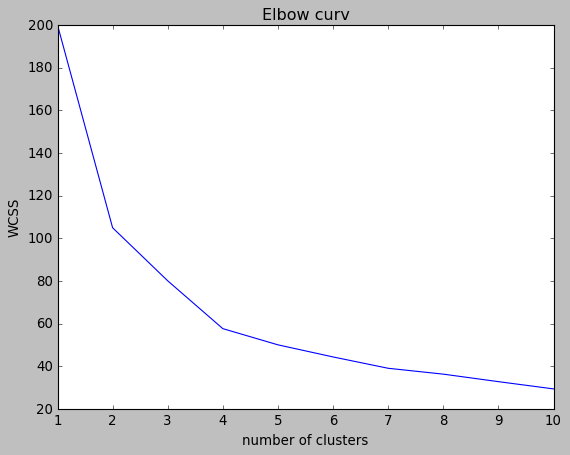

In [206]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(crime_kmeans_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Therefore from the elbow curve, we can observe that the number of clusters are 5

Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [207]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
for nc in range(2,6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(crime_kmeans_std)
    slht_scr= silhouette_score(crime_kmeans_std, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3068468000198128


Model with 4 no. of clusters has thelowest accuracy. Hence build the model with 4 no.of clusters.

In [213]:
# selecting 4 clusters from above obeservation
model=KMeans(n_clusters=4)
model1=model.fit_predict(crime_kmeans_std )
model1

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [214]:
model.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [215]:
model.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [216]:
model.inertia_

57.55425863091104

In [218]:
x=pd.Series(model1)
crime_kmeans['Clust']=x
crime_kmeans

,States,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


 Analysing the results obtained from the model

In [220]:
crime_kmeans.iloc[:,1:5].groupby(crim1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,10.883333,256.916667,78.333333,32.2500
1,5.715000,132.300000,70.800000,18.1000
2,14.087500,252.750000,53.500000,24.5375
3,3.180000,78.700000,49.300000,11.6300


Following are the Different states in each cluster¶

In [223]:
model_0=crime_kmeans[(crime_kmeans.Clust==0)]
model_0

,States,Murder,Assault,UrbanPop,Rape,Clust
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [224]:
model_1=crime_kmeans[(crime_kmeans.Clust==1)]
model_1

,States,Murder,Assault,UrbanPop,Rape,Clust
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [225]:
model_2=crime_kmeans[(crime_kmeans.Clust==2)]
model_2

,States,Murder,Assault,UrbanPop,Rape,Clust
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [226]:
model_3=crime_kmeans[(crime_kmeans.Clust==3)]
model_3

,States,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Figure size 960x480 with 0 Axes>

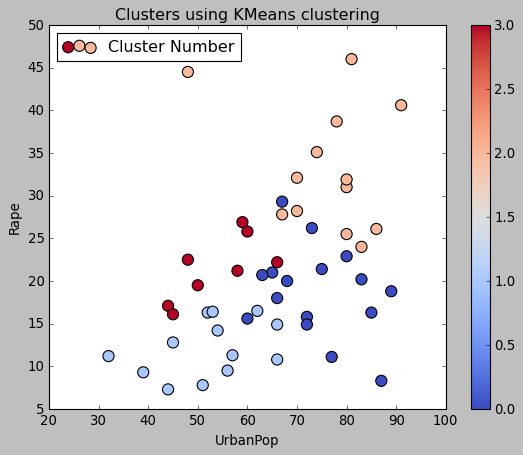

In [228]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_kmeans.plot(x="UrbanPop",y ="Rape",c=model.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

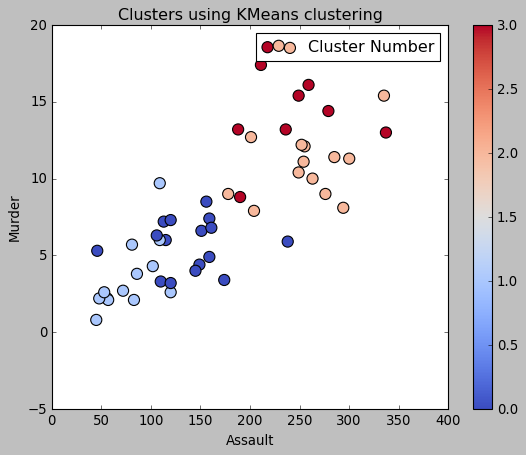

In [230]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_kmeans.plot(x="Assault",y ="Murder",c=model.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

Evaluating accuracy of the model using Silhouette score

In [231]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = silhouette_score(crime_kmeans_std,model.labels_) 
slht_scr_kc

0.33968891433344395

The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

# DBSCAN CLUSTERING MODEL

In [242]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_std)
distances, indices = nn.kneighbors(crime_std)  

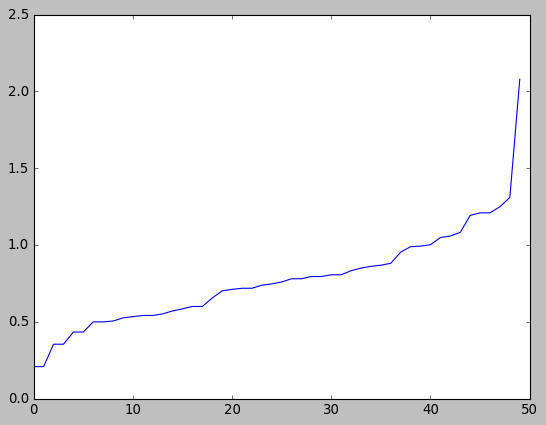

In [243]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

The curve took a sharp bend at a value of 1.25. Hence the epsilon value is 1.25.¶

Building the DBSCAN clustering model

In [244]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_std)

DBSCAN(eps=1.25)

In [245]:
d_cluster.labels_ 

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [246]:
ds = pd.Series(d_cluster.labels_) 
crime['clust']=ds
crime

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,clust
0,Alabama,13.2,236,58,21.2,3,0,0
1,Alaska,10.0,263,48,44.5,4,2,-1
2,Arizona,8.1,294,80,31.0,1,2,1
3,Arkansas,8.8,190,50,19.5,0,0,2
4,California,9.0,276,91,40.6,1,2,-1
5,Colorado,7.9,204,78,38.7,1,2,1
6,Connecticut,3.3,110,77,11.1,0,3,2
7,Delaware,5.9,238,72,15.8,0,3,2
8,Florida,15.4,335,80,31.9,1,2,-1
9,Georgia,17.4,211,60,25.8,3,0,0


In [253]:
#modifying the data
crime=crime.drop(['h_clusterid','Clust'],axis=1)
crime.head()

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


Analysing the results obtained from the model¶

In [254]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


Following are the Different states in each cluster

In [256]:
d_cluster_neg1 = crime[(crime.clust==-1)]
d_cluster_neg1   

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


these minus clusters are generally cattegorised as outlier

In [257]:
d_cluster_0 = crime[(crime.clust==0)]
d_cluster_0   

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [258]:
d_cluster_1 = crime[(crime.clust==1)]
d_cluster_1 

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [261]:
d_cluster_2 = crime[(crime.clust==2)]
d_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

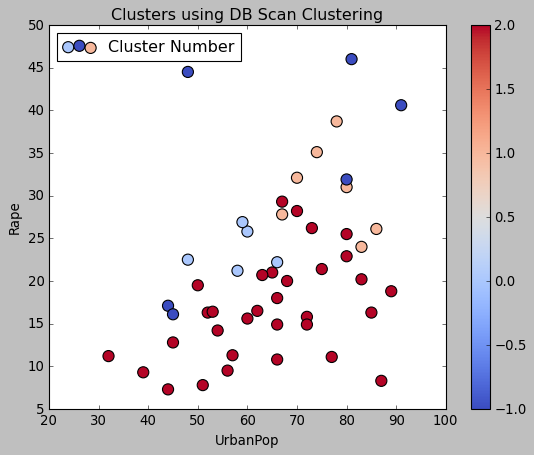

In [262]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="UrbanPop",y ="Rape",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan Clustering')  
plt.show()

<Figure size 960x480 with 0 Axes>

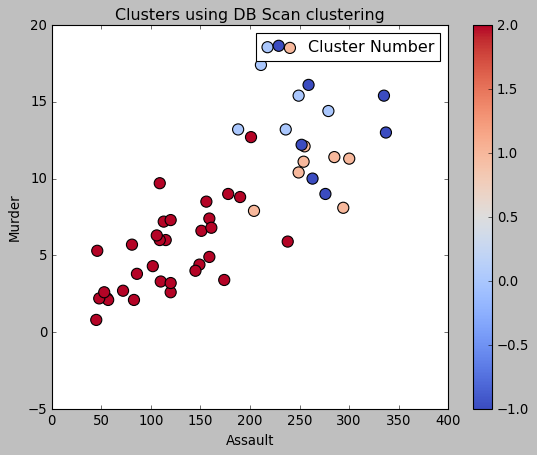

In [263]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="Assault",y ="Murder",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan clustering') 
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

Evaluating accuracy of the model using Silhouette score

In [265]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_dc = silhouette_score(crime_std, d_cluster.labels_) 
slht_scr_dc

0.23869670053300915

The Silhouette score considering 4 number of clusters is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. However it detected outliers.

Comparing all the models using Silhouette score¶

In [267]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)


The Silhouette score of Hierarchical Clustering: 0.3212682619092323
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915


Here we can see that the Silhouette score for Kmeans clustering is more than other two models.

<Figure size 960x480 with 0 Axes>

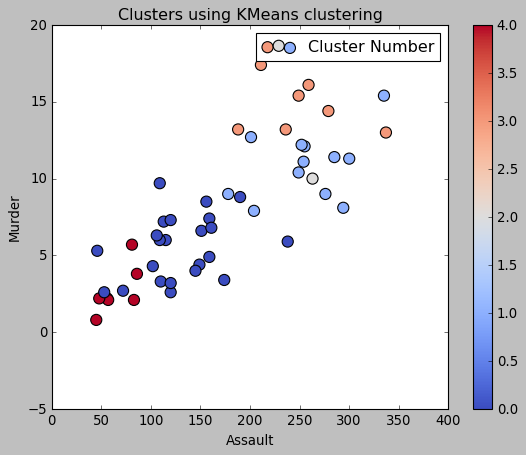

In [269]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

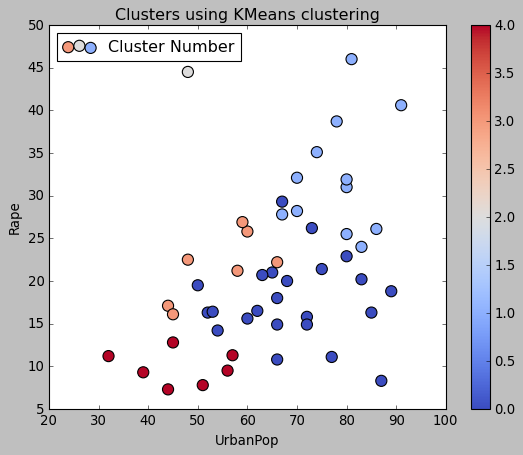

In [271]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

From Above plots we said to be:
    
    #The states in cluster 0 have less murder,assult and rape rates and can be considered as safe_zone
    
    #The States in cluster 1 have ,oderate crime rate and can be considerded as moderate_Zone
    
    #The states in cluster 3 have high crime rates and can be considered as danger Zone.

North dakota is the state with lowestcrime rate and can be considered as safest zone

florida is the state with High  crime rate and is not a safe place.